league_player: leagues played as a player, excluding commissioner leagues

played_private_self: boolean. Whether he played private league with self draft

played_private_live

played_private_auto

played_public_auto

played_public_live

week

days_visited_per_week

pty_sess_per_week

cpv_nflfantasy_per_week

league_commissioner

league_size_max

ranked_top_half: whether he ranked top half in at least one of his commissioner leagues

number_of_adds

number_of_roster_changes

number_of_accepted_trades

number_of_posted_messages 

as.factor(history): returned commissioner, returned player, new commissioner based on 3 year history

as.factor(other_league): commissioner, player or no activity for other leagues in 2015                 



In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("query_result (2).csv",sep = ",")

In [3]:
data.head()
data.columns

Index([u'nba2015_player_retention2.returned',
       u'nba2015_player_retention2.guid',
       u'nba2015_player_retention2.league_all',
       u'nba2015_player_retention2.comissioner',
       u'nba2015_player_retention2.comanager',
       u'nba2015_player_retention2.assistant_comissioner',
       u'nba2015_player_retention2.has_custom_logo',
       u'nba2015_player_retention2.league_size_max',
       u'nba2015_player_retention2.winning_pct_max',
       u'nba2015_player_retention2.cash_league',
       u'nba2015_player_retention2.ranked_top_half',
       u'nba2015_player_retention2.ranked_top3',
       u'nba2015_player_retention2.leagues_renewed',
       u'nba2015_player_retention2.leagues_auto_renewed',
       u'nba2015_player_retention2.leagues_was_renewed_and_teams_auto_filled',
       u'nba2015_player_retention2.number_of_adds',
       u'nba2015_player_retention2.number_of_roster_changes',
       u'nba2015_player_retention2.number_of_accepted_trades',
       u'nba2015_player_retentio

In [4]:
#Rename the column
newColumns = []
for column in data.columns:
    newColumns.append(column.split(".")[-1])

data.columns = newColumns

In [5]:
# Drop NaN columns
try:
    del data['winning_pct_max']
except:
    print("Already deleted")

data.head()

,returned,guid,league_all,comissioner,comanager,assistant_comissioner,has_custom_logo,league_size_max,cash_league,ranked_top_half,...,public_auto_plays,public_live_plays,cash_entry_fee_max,number_of_comissoners_avg,new,return_comissioner,return_player,other_league_inactive,other_league_comissioner,other_league_player
0,0,2224DLXMMZ7JSCFYISHYFPFQV4,1,0,0,0,0,12,0,0,...,0,0,0,1.0,0,0,1,0,0,1
1,0,2224VVHXYS3AL2RR7N5IOHQMII,1,0,0,0,0,12,0,0,...,0,0,0,1.0,0,0,1,1,0,0
2,1,22264CZFQ2KSRR6FV37JA42HHQ,1,0,0,0,1,10,0,1,...,0,0,0,1.0,0,1,0,0,1,0
3,1,222BRXZHDEJKYUPATVLVOAQG6Y,1,0,0,0,0,12,0,1,...,0,0,0,1.0,0,1,0,1,0,0
4,1,222HAPRSN6R4NGWHPFWA2XQGEQ,1,0,0,0,0,13,0,1,...,0,0,0,1.0,0,0,1,1,0,0


In [49]:
#Prepare training and testing dataset
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#data.ix[:,2:len(data.columns)] = preprocessing.scale(data.ix[:,2:len(data.columns)])

train, test = train_test_split(data, test_size = 0.2)

train_y = train['returned']
train_x = train.ix[:,2:len(train.columns)]

test_y = test['returned']
test_x = test.ix[:,2:len(train.columns)]


/Users/yizhouz/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':
/Users/yizhouz/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if sys.path[0] == '':


In [55]:
test_x.head()

,league_all,comissioner,comanager,assistant_comissioner,has_custom_logo,league_size_max,cash_league,ranked_top_half,ranked_top3,leagues_renewed,...,public_auto_plays,public_live_plays,cash_entry_fee_max,number_of_comissoners_avg,new,return_comissioner,return_player,other_league_inactive,other_league_comissioner,other_league_player
65806,2,0,0,0,0,6,0,1,1,0,...,0,0,0,1.0,1,0,0,1,0,0
289990,1,0,0,0,0,10,0,1,1,0,...,0,0,0,1.0,0,0,1,1,0,0
26571,1,0,0,0,1,10,0,0,0,0,...,0,0,0,1.0,1,0,0,1,0,0
287716,2,0,0,0,0,12,0,0,0,0,...,0,1,0,0.5,1,0,0,1,0,0
177700,1,0,0,0,0,12,0,1,1,0,...,0,0,0,1.0,1,0,0,1,0,0


## Exploratory data analysis

In [8]:
#total number of users in 2015
print('totual number of nba fantasy users: ',len(data))

#percentage of users returned in 2016
print('percentage of those users returned in 2016',np.sum(data['returned'])/312499.0)

('totual number of nba fantasy users: ', 312499)
('percentage of those users returned in 2016', 0.4632526824085837)


## Training Part

## 1. Decision Tree

In [9]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=4,max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')
clf.fit(train_x,train_y)

#initial training and testing scores
print("training score: ",clf.score(train_x,train_y))
print("testing score:", clf.score(test_x,test_y))

('training score: ', 0.76971107884431533)
('testing score:', 0.77011200000000002)


In [10]:
with open("tree.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f,feature_names= \
                             train_x.columns,class_names=["Leave","Returned"])

In [11]:
##See tree 1.jpg for details
clf.feature_importances_

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.00599886,  0.        ,  0.        ,  0.        ,  0.17155666,
        0.        ,  0.        ,  0.05452133,  0.6054788 ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.16244435,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

In [12]:
train.columns[9],train.columns[12],train.columns[13],train.columns[18]

('ranked_top_half',
 'leagues_auto_renewed',
 'leagues_was_renewed_and_teams_auto_filled',
 'private_self_plays')

## 2.Random Forest

In [13]:
from sklearn.ensemble import ExtraTreesClassifier

In [14]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators = 10,max_depth=5,
                              random_state=0)

In [15]:
forest.fit(train_x,train_y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=5, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [16]:
#initial training and testing scores
print("training score: ",forest.score(train_x,train_y))
print("testing score:", forest.score(test_x,test_y))

('training score: ', 0.73704694818779271)
('testing score:', 0.73806400000000005)


In [17]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

Feature ranking:
1. feature new (0.370260)
2. feature return_player (0.228108)
3. feature leagues_renewed (0.121405)
4. feature ranked_top_half (0.072809)
5. feature has_custom_logo (0.051890)
6. feature return_comissioner (0.046638)
7. feature other_league_inactive (0.035157)
8. feature ranked_top3 (0.017188)
9. feature league_size_max (0.016451)
10. feature private_live_plays (0.008781)
11. feature number_of_adds (0.006874)
12. feature number_of_comissoners_avg (0.005146)
13. feature number_of_roster_changes (0.004145)
14. feature comissioner (0.003967)
15. feature other_league_player (0.003266)
16. feature leagues_auto_renewed (0.002144)
17. feature assistant_comissioner (0.002018)
18. feature other_league_comissioner (0.001654)
19. feature number_of_posted_messages (0.000605)
20. feature private_auto_plays (0.000425)
21. feature cash_league (0.000361)
22. feature public_live_plays (0.000170)
23. feature number_of_accepted_trades (0.000167)
24. feature league_all (0.000166)
25. feat

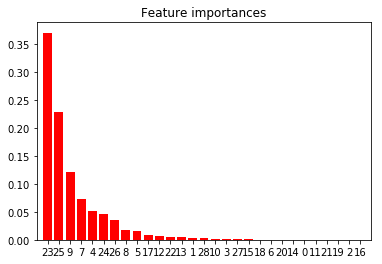

In [43]:
# Print the feature ranking
print("Feature ranking:")

for f in range(train_x.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, train_x.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_x.shape[1]), importances[indices],
       color="r")#yerr=std[indices], align="center")
plt.xticks(range(train_x.shape[1]), indices)
plt.xlim([-1, train_x.shape[1]])
plt.show()

In [19]:
#most important five 
print(train_x.columns[indices[:10]])

Index([u'new', u'return_player', u'leagues_renewed', u'ranked_top_half',
       u'has_custom_logo', u'return_comissioner', u'other_league_inactive',
       u'ranked_top3', u'league_size_max', u'private_live_plays'],
      dtype='object')


## 3. Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
clf_l1_LR = LogisticRegression(C=1, penalty='l1', tol=0.001)
clf_l1_LR.fit(train_x,train_y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.001,
          verbose=0, warm_start=False)

In [52]:
#initial training and testing scores
print("training score: ",clf_l1_LR.score(train_x,train_y))
print("testing score:", clf_l1_LR.score(test_x,test_y))

('training score: ', 0.77814711258845037)
('testing score:', 0.77780800000000005)


In [53]:
coef_l1_LR = clf_l1_LR.coef_.ravel()
coef_l1_LR

array([ 0.07332295,  0.00467404, -0.9854309 ,  0.06612333,  0.19813325,
        0.06766444,  0.00881156,  0.10495851,  0.08932152,  0.81676682,
        0.51661934, -0.11380453,  0.01463897,  0.00186022,  0.0300358 ,
        0.00338019,  0.05246134,  0.14996369, -0.04533228,  0.45861558,
        0.02412692,  0.00318989,  0.24858692, -1.52156306, -0.44858163,
       -0.43648885, -1.15666796, -0.76746469, -0.78873906])

In [54]:
train_x.columns

Index([u'league_all', u'comissioner', u'comanager', u'assistant_comissioner',
       u'has_custom_logo', u'league_size_max', u'cash_league',
       u'ranked_top_half', u'ranked_top3', u'leagues_renewed',
       u'leagues_auto_renewed', u'leagues_was_renewed_and_teams_auto_filled',
       u'number_of_adds', u'number_of_roster_changes',
       u'number_of_accepted_trades', u'number_of_posted_messages',
       u'private_self_plays', u'private_live_plays', u'private_auto_plays',
       u'public_auto_plays', u'public_live_plays', u'cash_entry_fee_max',
       u'number_of_comissoners_avg', u'new', u'return_comissioner',
       u'return_player', u'other_league_inactive', u'other_league_comissioner',
       u'other_league_player'],
      dtype='object')

In [42]:
[(x,y) for (y,x) in sorted(zip(coef_l1_LR,train_x.columns), key=lambda pair: np.abs(pair[0]), reverse=True)] 

[('leagues_renewed', 0.69792552337789038),
 ('number_of_roster_changes', 0.52759114320361644),
 ('league_all', 0.48825805517599119),
 ('new', -0.48155576565153679),
 ('number_of_adds', 0.37921074421393947),
 ('league_size_max', 0.25622635408004663),
 ('other_league_inactive', -0.23577187620273288),
 ('private_live_plays', 0.19884993996803446),
 ('number_of_comissoners_avg', 0.1656453198982622),
 ('number_of_accepted_trades', 0.14853386315971748),
 ('has_custom_logo', 0.080752826256044075),
 ('leagues_auto_renewed', 0.078528165135226785),
 ('comanager', -0.074457474044531943),
 ('public_live_plays', 0.073547989893852889),
 ('public_auto_plays', 0.060788980113568994),
 ('return_player', 0.059881098830499899),
 ('ranked_top3', 0.053296203757533973),
 ('other_league_player', -0.049600652195127125),
 ('ranked_top_half', 0.038115800090361786),
 ('other_league_comissioner', -0.033149145487921403),
 ('private_auto_plays', -0.029826355064128875),
 ('return_comissioner', 0.026218752992376717),
 

In [31]:
print("C=%.2f" % 0.01)
sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
print("Sparsity with L1 penalty: %.2f%%" % sparsity_l1_LR)


C=0.01
Sparsity with L1 penalty: 0.00%


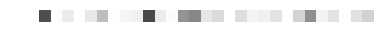

In [32]:
plt.imshow(np.abs(coef_l1_LR.reshape(1, 29)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)
plt.axis("off")
plt.show()

In [33]:
train_x.columns[np.abs(coef_l1_LR) > 0]

Index([u'league_all', u'comissioner', u'comanager', u'assistant_comissioner',
       u'has_custom_logo', u'league_size_max', u'cash_league',
       u'ranked_top_half', u'ranked_top3', u'leagues_renewed',
       u'leagues_auto_renewed', u'leagues_was_renewed_and_teams_auto_filled',
       u'number_of_adds', u'number_of_roster_changes',
       u'number_of_accepted_trades', u'number_of_posted_messages',
       u'private_self_plays', u'private_live_plays', u'private_auto_plays',
       u'public_auto_plays', u'public_live_plays', u'cash_entry_fee_max',
       u'number_of_comissoners_avg', u'new', u'return_comissioner',
       u'return_player', u'other_league_inactive', u'other_league_comissioner',
       u'other_league_player'],
      dtype='object')

Features: new-, leagues_renewed, other_league_inactive-, private_live_plays, has_custom_logo

## Prediction

In [76]:
pre_data = pd.read_csv("prediction_data.csv",sep=",")

In [77]:
pre_data.head()

,nba2016_player2.guid,nba2016_player2.league_all,nba2016_player2.comissioner,nba2016_player2.comanager,nba2016_player2.assistant_comissioner,nba2016_player2.has_custom_logo,nba2016_player2.league_size_max,nba2016_player2.winning_pct_max,nba2016_player2.cash_league,nba2016_player2.ranked_top_half,...,nba2016_player2.public_auto_plays,nba2016_player2.public_live_plays,nba2016_player2.cash_entry_fee_max,nba2016_player2.number_of_comissoners_avg,nba2016_player2.new,nba2016_player2.return_comissioner,nba2016_player2.return_player,nba2016_player2.other_league_inactive,nba2016_player2.other_league_comissioner,nba2016_player2.other_league_player
0,22264CZFQ2KSRR6FV37JA42HHQ,1,0,0,0,1,10,NaN,0,1,...,0,0,0,1.0,0,1,0,0,1,0
1,222BRXZHDEJKYUPATVLVOAQG6Y,2,0,0,0,0,14,NaN,0,1,...,0,0,0,1.0,0,1,0,1,0,0
2,222HAPRSN6R4NGWHPFWA2XQGEQ,2,0,0,0,0,16,0.0,0,1,...,0,0,0,1.5,0,0,1,1,0,0
3,222HBKDYKDMIOINWNAAM6WLVNY,1,0,0,0,0,12,NaN,0,0,...,0,0,0,1.0,0,0,1,1,0,0
4,222I7TRQQSSJFYZRZ7WXOPDBBU,1,0,0,0,0,12,NaN,0,0,...,0,0,0,1.0,1,0,0,1,0,0


In [78]:
preX = pre_data.ix[:,1:len(pre_data.columns)]

/Users/yizhouz/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [79]:
#Rename the column
newColumns = []
for column in preX.columns:
    newColumns.append(column.split(".")[-1])

preX.columns = newColumns
# Drop NaN columns
try:
    del preX['winning_pct_max']
except:
    print("Already deleted")

preX.head()

,league_all,comissioner,comanager,assistant_comissioner,has_custom_logo,league_size_max,cash_league,ranked_top_half,ranked_top3,leagues_renewed,...,public_auto_plays,public_live_plays,cash_entry_fee_max,number_of_comissoners_avg,new,return_comissioner,return_player,other_league_inactive,other_league_comissioner,other_league_player
0,1,0,0,0,1,10,0,1,1,1,...,0,0,0,1.0,0,1,0,0,1,0
1,2,0,0,0,0,14,0,1,1,1,...,0,0,0,1.0,0,1,0,1,0,0
2,2,0,0,0,0,16,0,1,1,2,...,0,0,0,1.5,0,0,1,1,0,0
3,1,0,0,0,0,12,0,0,0,1,...,0,0,0,1.0,0,0,1,1,0,0
4,1,0,0,0,0,12,0,0,0,0,...,0,0,0,1.0,1,0,0,1,0,0


In [80]:
preX = preprocessing.scale(preX)

In [81]:
print(np.mean(forest.predict(preX)))
#np.mean(clf_l1_LR.predict(preX))

NameError: name 'forest' is not defined

In [154]:
len(preX)

322579

In [48]:
train_x.columns

Index([u'league_all', u'comissioner', u'comanager', u'assistant_comissioner',
       u'has_custom_logo', u'league_size_max', u'cash_league',
       u'ranked_top_half', u'ranked_top3', u'leagues_renewed',
       u'leagues_auto_renewed', u'leagues_was_renewed_and_teams_auto_filled',
       u'number_of_adds', u'number_of_roster_changes',
       u'number_of_accepted_trades', u'number_of_posted_messages',
       u'private_self_plays', u'private_live_plays', u'private_auto_plays',
       u'public_auto_plays', u'public_live_plays', u'cash_entry_fee_max',
       u'number_of_comissoners_avg', u'new', u'return_comissioner',
       u'return_player', u'other_league_inactive', u'other_league_comissioner',
       u'other_league_player'],
      dtype='object')

In [46]:
len(train_x),len(test_x)

(249999, 62500)

In [47]:
coef_l1_LR

array([ 0.        ,  0.        , -0.0455871 ,  0.        ,  0.06902927,
        0.24083773,  0.        ,  0.0646423 ,  0.03580576,  0.67589271,
        0.040894  ,  0.        ,  0.41505706,  0.47875482,  0.        ,
        0.        ,  0.        ,  0.15558782,  0.        ,  0.03362738,
        0.        ,  0.        ,  0.12545871, -0.53444873,  0.        ,
        0.        , -0.15256109,  0.        ,  0.        ])

In [63]:
train_x.columns[15]

'number_of_posted_messages'

In [26]:
train_x.shape,train_y.shape

((249999, 29), (249999,))

In [13]:
list(train_x.columns).index("new")

23

In [67]:
np.sum(train_y[train_x['ranked_top_half']  == 1])

62513L

In [36]:
np.sum(train_y == 1)

115882

In [66]:
np.sum(train_x['ranked_top_half'] == 1)

108328

In [24]:
[(x,y) for (y,x) in sorted(zip(coef_l1_LR,train_x.columns), key=lambda pair: np.abs(pair[0]), reverse=True)] 

[('league_all', 0.76583699236731895),
 ('leagues_renewed', 0.69974645891113063),
 ('number_of_roster_changes', 0.53279471320104688),
 ('return_player', 0.42161294969848012),
 ('number_of_adds', 0.36884775314106111),
 ('league_size_max', 0.25737270149603975),
 ('return_comissioner', 0.23374122907910297),
 ('public_live_plays', -0.1707661659483426),
 ('number_of_comissoners_avg', 0.16702683762077949),
 ('number_of_accepted_trades', 0.15377703407903884),
 ('other_league_player', 0.12395498659650556),
 ('new', -0.11302369984255135),
 ('private_live_plays', 0.10991061558428208),
 ('has_custom_logo', 0.080733166007930596),
 ('other_league_comissioner', 0.080178726943659656),
 ('leagues_auto_renewed', 0.078094225318410981),
 ('comanager', -0.073540389518437582),
 ('ranked_top3', 0.06349292079983225),
 ('private_auto_plays', -0.055064861048483162),
 ('other_league_inactive', -0.054463631209412562),
 ('public_auto_plays', 0.052775752831876861),
 ('ranked_top_half', 0.03138295584579557),
 ('comi

array([ 0.49488201,  0.00903234, -0.06997547,  0.00357765,  0.08536125,
        0.24545995,  0.        ,  0.06909138,  0.03620841,  0.70183742,
        0.06730747, -0.00335416,  0.41235859,  0.49826093,  0.20464455,
        0.01115004,  0.0073364 ,  0.1603295 , -0.02718585,  0.05670157,
        0.        ,  0.0080064 ,  0.15938051, -0.01209895,  0.2931242 ,
        0.51681253, -0.10951925,  0.05275339,  0.07208555])

## SVM

In [9]:
from sklearn import svm

In [13]:
clfsvc = svm.SVC(tol = 1)
clfsvc.fit(train_x[:10000],train_y[:10000])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True, tol=1,
  verbose=False)

In [15]:
clfsvc.score(train_x,train_y)

0.77820711282845134

## QDA

In [16]:
 from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [18]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(train_x,train_y)

/Users/yizhouz/anaconda/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001)

In [19]:
qda.score(train_x,train_y)

0.62829051316205264

## NN

In [60]:

from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout

In [55]:
Y = []
train_y = np.array(train_y)
train_x = np.array(train_x)
for i in range(len(train_y)):
    if train_y[i] == 0:
        Y.append([0,1])
    else:
        Y.append([1,0])

Y = np.array(Y)

In [56]:
dims = train_x.shape[1]
nb_classes = 2

In [58]:
#logistic regression
model = Sequential()
model.add(Dense(2, input_shape=(dims,)))
model.add(Activation('softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_x, Y)

Epoch 1/10
249999/249999 [==============================] - 7s - loss: 0.4899 - acc: 0.7762     
Epoch 2/10
249999/249999 [==============================] - 7s - loss: 0.4834 - acc: 0.7778     
Epoch 3/10
249999/249999 [==============================] - 7s - loss: 0.4833 - acc: 0.7783     
Epoch 4/10
249999/249999 [==============================] - 7s - loss: 0.4833 - acc: 0.7782     
Epoch 5/10
249999/249999 [==============================] - 8s - loss: 0.4833 - acc: 0.7784     
Epoch 6/10
249999/249999 [==============================] - 8s - loss: 0.4833 - acc: 0.7785     
Epoch 7/10
249999/249999 [==============================] - 8s - loss: 0.4833 - acc: 0.7780     
Epoch 8/10
249999/249999 [==============================] - 8s - loss: 0.4832 - acc: 0.7783     
Epoch 9/10
249999/249999 [==============================] - 8s - loss: 0.4832 - acc: 0.7782     
Epoch 10/10
249999/249999 [==============================] - 8s - loss: 0.4833 - acc: 0.7780     


In [73]:
model = Sequential()
model.add(Dense(64, input_dim=dims, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

In [74]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 64)                1920      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 33        
Total params: 14,401
Trainable params: 14,401
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(train_x, train_y,
          epochs=5,
          batch_size=128)

Epoch 1/5
249999/249999 [==============================] - 4s - loss: 0.4846 - acc: 0.7773     
Epoch 2/5
249999/249999 [==============================] - 4s - loss: 0.4753 - acc: 0.7817     
Epoch 3/5
249999/249999 [==============================] - 4s - loss: 0.4739 - acc: 0.7827     
Epoch 4/5
249999/249999 [==============================] - 4s - loss: 0.4725 - acc: 0.7836     
Epoch 5/5
249999/249999 [==============================] - 4s - loss: 0.4720 - acc: 0.7830     


In [86]:
model.evaluate(np.array(test_x),np.array(test_y))

61952/62500 [============================>.] - ETA: 0s

[0.46987436616897582, 0.78376000000000001]

In [85]:
(np.sum(model.predict(preX)>0.5)+0.0)/len(preX)

0.45804593603427379

# Plotting part

In [6]:
data.head()

,returned,guid,league_all,comissioner,comanager,assistant_comissioner,has_custom_logo,league_size_max,cash_league,ranked_top_half,...,public_auto_plays,public_live_plays,cash_entry_fee_max,number_of_comissoners_avg,new,return_comissioner,return_player,other_league_inactive,other_league_comissioner,other_league_player
0,0,2224DLXMMZ7JSCFYISHYFPFQV4,1,0,0,0,0,12,0,0,...,0,0,0,1.0,0,0,1,0,0,1
1,0,2224VVHXYS3AL2RR7N5IOHQMII,1,0,0,0,0,12,0,0,...,0,0,0,1.0,0,0,1,1,0,0
2,1,22264CZFQ2KSRR6FV37JA42HHQ,1,0,0,0,1,10,0,1,...,0,0,0,1.0,0,1,0,0,1,0
3,1,222BRXZHDEJKYUPATVLVOAQG6Y,1,0,0,0,0,12,0,1,...,0,0,0,1.0,0,1,0,1,0,0
4,1,222HAPRSN6R4NGWHPFWA2XQGEQ,1,0,0,0,0,13,0,1,...,0,0,0,1.0,0,0,1,1,0,0


In [7]:
agb = data.groupby(['new','leagues_renewed'])['returned']

In [8]:
agb.mean().unstack()

leagues_renewed,0,1,2,3,4,5,6,7,8,288
new,,,,,,,,,,
0,0.530965,0.766731,0.921189,0.952923,0.97549,0.975610,0.990244,0.984496,0.9875,1.0
1,0.197249,0.509128,0.664948,0.777778,0.76000,0.916667,0.857143,0.500000,0.0000,NaN


In [9]:
agb.count().unstack()

leagues_renewed,0,1,2,3,4,5,6,7,8,288
new,,,,,,,,,,
0,56160.0,82364.0,11407.0,2549.0,816.0,410.0,205.0,129.0,80.0,1.0
1,139489.0,18186.0,582.0,72.0,25.0,12.0,7.0,2.0,3.0,NaN


In [10]:
from bokeh.plotting import figure, output_file, show, output_notebook,ColumnDataSource
from bokeh.models import HoverTool,ColorBar, LogColorMapper

In [11]:
sizetable = agb.count().unstack()
colortable = agb.mean().unstack()
sizetable = sizetable.fillna(0)
colortable = colortable.fillna(0)
x = ['new','returned']
y = np.arange(1,11)
colors = [
    ["#%02x%02x%02x" % (int(r), int(s), 150) \
    for r, s in zip(colortable.ix[0,:]*500 % 196, colortable.ix[0,:]*200)],
    ["#%02x%02x%02x" % (int(r), int(s), 150) \
    for r, s in zip(colortable.ix[0,:]*500 % 196, colortable.ix[1,:]*200)]
]
colors

/Users/yizhouz/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


[['#456a96',
  '#bb9996',
  '#44b896',
  '#54be96',
  '#5fc396',
  '#5fc396',
  '#67c696',
  '#64c496',
  '#65c596',
  '#6cc896'],
 ['#452796',
  '#bb6596',
  '#448496',
  '#549b96',
  '#5f9896',
  '#5fb796',
  '#67ab96',
  '#646496',
  '#650096',
  '#6c0096']]

In [12]:
colortable.fillna(0)

leagues_renewed,0,1,2,3,4,5,6,7,8,288
new,,,,,,,,,,
0,0.530965,0.766731,0.921189,0.952923,0.97549,0.975610,0.990244,0.984496,0.9875,1.0
1,0.197249,0.509128,0.664948,0.777778,0.76000,0.916667,0.857143,0.500000,0.0000,0.0


In [14]:
hover1 = HoverTool(tooltips = [
    #("User Type","@type"),
    ("leagues #", "@string_y"),
    ("count", "@count"),
    ("Retention","@ret%")
])

source1 = ColumnDataSource(data = dict(
    x = np.repeat(1,10),
    y = np.arange(1,11),
    string_y = [str(i) if i < 9 else ">8"for i in range(1,11)],
    count = [str(int(i)) for i in sizetable.ix[0,:]],
    ret = [str(i) for i in np.floor(10000*colortable.ix[0,:])/100]
))

hover2 = HoverTool(tooltips = [
    #("User Type","@type"),
    ("leagues #", "@string_y"),
    ("count", "@count"),
    ("Retention","@ret%")
])

source2 = ColumnDataSource(data = dict(
    x = np.repeat(2,10),
    y = np.arange(1,11),
    string_y = [str(i) if i < 9 else ">8"for i in range(1,11)],
    count = [str(int(i)) for i in sizetable.ix[1,:]],
    ret = [str(i) for i in np.floor(10000*colortable.ix[1,:])/100]
))


TOOLS="resize,pan,wheel_zoom,box_zoom,reset,box_select,save"
p = figure(tools=[hover1,hover2,"pan","save","wheel_zoom"],x_range =["returned","new"], y_range=(0,11))
#p.circle(np.repeat(1,10),y,radius = (np.log2(sizetable.ix[0,:])/180),
#         fill_alpha = colortable.ix[0,:]**2,
#         fill_color = "#4f1e2e",line_color = "#4f1e2e")

p.circle('x', 'y',radius = (np.log2(sizetable.ix[0,:])/180), 
         fill_alpha = colortable.ix[0,:]**2,fill_color = "#4f1e2e",line_color = "#4f1e2e",
         source=source1)
#p.circle(np.repeat(2,10),y,radius = (np.log2(sizetable.ix[1,:])/180),
#         fill_alpha = colortable.ix[1,:]**2,
#        fill_color = '#4f1e2e',line_color = "#4f1e2e")
p.circle('x', 'y',radius = (np.log2(sizetable.ix[1,:])/180), 
         fill_alpha = colortable.ix[1,:]**2,fill_color = "#4f1e2e",line_color = "#4f1e2e",
         source=source2)   
#Style
p.title.text = "NBA fantasy users churn analysis 2015-2016"
p.title.align = "center"
p.yaxis.axis_label = "Number of leagues played"
p.xaxis.axis_label = "Player type"
p.xgrid.visible = False
p.ygrid.band_fill_alpha = 0.1
p.ygrid.band_fill_color = "beige"


#Color bar
#color_mapper = LogColorMapper(palette="#Blue8", low=1, high=1e7)
#color_bar = ColorBar(color_mapper =  colors[0])
#p.add_layout(color_bar)

output_file("nba_fantasy_ana.html")
show(p)

/Users/yizhouz/anaconda/lib/python2.7/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
/Users/yizhouz/anaconda/lib/python2.7/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
/Users/yizhouz/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log2
/Users/yizhouz/anaconda/lib/python2.7/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
/Users/yizhouz/anac

In [240]:
agd = data.groupby(['has_custom_logo'])['returned']
agd.mean()

has_custom_logo
0    0.404410
1    0.660929
Name: returned, dtype: float64

In [248]:
from bokeh.charts import Donut
piedata = pd.Series([0.4044,0.661],index = ["Has custom logo","Does not"])
pie_chart = Donut(piedata)
pie_chart.title.text = "Custom Logo"
show(pie_chart)

In [15]:
his = pd.read_csv("nba_user_history.csv")

In [16]:
his.head()

,GAME NAME,game id,Total number of users,Number of comissisoners,Percentage of comissoners,Users return from last year,User returning rate,Commissioner continue from last year,commissioner continuing rate,Commissioner return from last year,Commissioner returning rate,Player return rom last year,Player returning rate,Player to commissioner,Number of cash users,Avg money spent by each user
0,NBA 2010,249,699831,89248,0.128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NBA 2011,265,776118,101752,0.131,355921.0,0.509,36635.0,0.360,53255.0,0.597,302666.0,0.496,18891.0,0.0,0.0
2,NBA 2012,304,871293,123418,0.142,386082.0,0.497,40914.0,0.332,59027.0,0.580,327055.0,0.485,17564.0,0.0,0.0
3,NBA 2013,322,841293,125293,0.149,391295.0,0.449,42485.0,0.339,60111.0,0.487,331184.0,0.443,19406.0,0.0,0.0
4,NBA 2014,342,865890,122878,0.142,388945.0,0.462,43629.0,0.355,61124.0,0.488,327821.0,0.458,17535.0,0.0,0.0
